# Part-1: Data Exploration and Preparation

Loading of necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns

Loading data

In [2]:
data = pd.read_csv('ms.csv')
data

,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,1,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,...,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49,C
1,?,convex,brown,narrow,tapering,urban,edible,2,brown,several,...,scaly,pink,white,universal,white,?,3/5/2023,3/4/2023,13,F
2,3,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,...,?,gray,orange,partial,orange,1.9776191125191191,1/8/2022,1/4/2022,10,C
3,4,sunken,gray,narrow,tapering,?,poisonous,4,orange,scattered,...,scaly,gray,orange,universal,yellow,2.2727627620673605,2/10/2023,2/2/2023,22,C
4,5,flat,red,?,enlarging,urban,edible,7,brown,several,...,fibrous,orange,white,partial,white,0.7188737847331463,1/9/2023,1/4/2023,9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,...,smooth,white,orange,universal,white,3.755729472021494,1/7/2022,1/5/2022,25,C
996,997,conical,brown,broad,tapering,woods,edible,1,orange,numerous,...,fibrous,white,brown,partial,brown,?,5/11/2023,5/3/2023,4,C
997,998,conical,?,narrow,tapering,?,edible,10,brown,scattered,...,silky,gray,orange,partial,yellow,11.2583910697714988,3/7/2023,3/4/2023,19,C
998,999,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,...,?,pink,orange,universal,brown,4.964073966,3/2/2023,3/2/2023,20,C


Get statistical information of all columns

In [3]:
data.describe(include='all')


,Mushroom ID,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000
unique,879,6,6,3,3,6,3,11,6,6,...,5,6,6,3,5,920,168,87,NaN,2
top,?,conical,gray,narrow,enlarging,urban,edible,3,brown,numerous,...,silky,pink,gray,universal,white,?,4/10/2023,5/1/2023,NaN,C
freq,122,188,193,464,491,198,446,109,202,199,...,228,190,197,460,244,81,27,45,NaN,967
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.666000,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.698742,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.000000,NaN


Get data type information of all columns

In [4]:
data.dtypes

Mushroom ID                 object
Cap Shape                   object
Cap Color                   object
Gill Size                   object
Stalk Shape                 object
Habitat                     object
Edibility                   object
Market Demand               object
Spore Print Color           object
Population                  object
Odor                        object
Bruising                    object
Ring Type                   object
Stalk Surface Above Ring    object
Stalk Surface Below Ring    object
Stalk Color Above Ring      object
Stalk Color Below Ring      object
Veil Type                   object
Veil Color                  object
Growth Rate                 object
Inspection Date             object
Incubation date             object
Temperature                  int64
Measurement                 object
dtype: object

Remove the "Mushroom ID" column since it is irrelevant for to be input as machine learning model 

In [5]:
data = data.drop('Mushroom ID', axis=1)
data

,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,...,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49,C
1,convex,brown,narrow,tapering,urban,edible,2,brown,several,foul,...,scaly,pink,white,universal,white,?,3/5/2023,3/4/2023,13,F
2,flat,brown,broad,enlarging,grasses,edible,8,yellow,scattered,musty,...,?,gray,orange,partial,orange,1.9776191125191191,1/8/2022,1/4/2022,10,C
3,sunken,gray,narrow,tapering,?,poisonous,4,orange,scattered,creosote,...,scaly,gray,orange,universal,yellow,2.2727627620673605,2/10/2023,2/2/2023,22,C
4,flat,red,?,enlarging,urban,edible,7,brown,several,almond,...,fibrous,orange,white,partial,white,0.7188737847331463,1/9/2023,1/4/2023,9,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sunken,red,broad,enlarging,woods,poisonous,4,brown,abundant,?,...,smooth,white,orange,universal,white,3.755729472021494,1/7/2022,1/5/2022,25,C
996,conical,brown,broad,tapering,woods,edible,1,orange,numerous,musty,...,fibrous,white,brown,partial,brown,?,5/11/2023,5/3/2023,4,C
997,conical,?,narrow,tapering,?,edible,10,brown,scattered,foul,...,silky,gray,orange,partial,yellow,11.2583910697714988,3/7/2023,3/4/2023,19,C
998,sunken,red,narrow,enlarging,grasses,edible,6,brown,scattered,almond,...,?,pink,orange,universal,brown,4.964073966,3/2/2023,3/2/2023,20,C


Identifying the columns that contains "?" in any of the rows

In [6]:
columns_with_question_mark = [column for column in data.columns if data[column].astype(str).str.contains('\?').any()]
columns_with_question_mark

['Cap Shape',
 'Cap Color',
 'Gill Size',
 'Stalk Shape',
 'Habitat',
 'Edibility',
 'Market Demand',
 'Spore Print Color',
 'Population',
 'Odor',
 'Bruising',
 'Ring Type',
 'Stalk Surface Above Ring',
 'Stalk Surface Below Ring',
 'Stalk Color Above Ring',
 'Stalk Color Below Ring',
 'Veil Type',
 'Veil Color',
 'Growth Rate']

Droping the rows that contains "?" in any of the rows

In [7]:
df_cleaned = data[~data[columns_with_question_mark].astype(str).apply(lambda x: x.str.contains('\?')).any(axis=1)].reset_index().drop('index', axis=1)
df_cleaned

,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,...,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49,C
1,bell,yellow,broad,enlarging,leaves,edible,8,brown,numerous,almond,...,silky,gray,pink,universal,yellow,4.471316648,1/2/2022,1/2/2022,18,C
2,convex,red,narrow,enlarging,urban,edible,4,orange,numerous,foul,...,silky,orange,orange,partial,white,3.9783564690608615,3/7/2023,3/3/2023,1,C
3,convex,red,broad,tapering,woods,edible,2,yellow,solitary,foul,...,scaly,brown,gray,partial,yellow,1.5922072807712329,4/14/2023,4/5/2023,5,C
4,convex,white,narrow,enlarging,urban,edible,1,white,several,musty,...,smooth,gray,white,partial,yellow,3.143234817538799,3/7/2023,3/3/2023,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,conical,brown,narrow,tapering,urban,poisonous,5,orange,solitary,almond,...,scaly,brown,pink,partial,orange,3.4035697795027953,5/7/2023,5/1/2023,28,C
127,flat,yellow,broad,enlarging,urban,edible,4,black,numerous,anise,...,silky,orange,pink,partial,brown,1.9385124867425854,3/11/2023,3/3/2023,28,C
128,conical,gray,narrow,enlarging,grasses,poisonous,4,yellow,solitary,foul,...,smooth,gray,gray,partial,yellow,1.4202926693977478,3/2/2023,3/2/2023,15,C
129,sunken,white,broad,enlarging,woods,poisonous,9,yellow,abundant,foul,...,scaly,gray,brown,universal,orange,3.779518165668043,1/7/2023,1/5/2023,6,C


It can be observed that the cleaned dataset contains 131 rows where original dataset contains 1000 rows

Function defination: convert_to_celsius: to convert to unform temperature scale on "Temperature" column

In [8]:
def convert_to_celsius(row):
    if row['Measurement'] == 'F':

        return (row['Temperature'] - 32) * 5.0/9.0
    else:
        return row['Temperature']

Applying convert_to_celsius() on cleaned_df

In [9]:
df_cleaned.loc[:, 'Temperature'] = df_cleaned.apply(lambda row: convert_to_celsius(row), axis=1)
df_cleaned

,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,...,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature,Measurement
0,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,...,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49.0,C
1,bell,yellow,broad,enlarging,leaves,edible,8,brown,numerous,almond,...,silky,gray,pink,universal,yellow,4.471316648,1/2/2022,1/2/2022,18.0,C
2,convex,red,narrow,enlarging,urban,edible,4,orange,numerous,foul,...,silky,orange,orange,partial,white,3.9783564690608615,3/7/2023,3/3/2023,1.0,C
3,convex,red,broad,tapering,woods,edible,2,yellow,solitary,foul,...,scaly,brown,gray,partial,yellow,1.5922072807712329,4/14/2023,4/5/2023,5.0,C
4,convex,white,narrow,enlarging,urban,edible,1,white,several,musty,...,smooth,gray,white,partial,yellow,3.143234817538799,3/7/2023,3/3/2023,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,conical,brown,narrow,tapering,urban,poisonous,5,orange,solitary,almond,...,scaly,brown,pink,partial,orange,3.4035697795027953,5/7/2023,5/1/2023,28.0,C
127,flat,yellow,broad,enlarging,urban,edible,4,black,numerous,anise,...,silky,orange,pink,partial,brown,1.9385124867425854,3/11/2023,3/3/2023,28.0,C
128,conical,gray,narrow,enlarging,grasses,poisonous,4,yellow,solitary,foul,...,smooth,gray,gray,partial,yellow,1.4202926693977478,3/2/2023,3/2/2023,15.0,C
129,sunken,white,broad,enlarging,woods,poisonous,9,yellow,abundant,foul,...,scaly,gray,brown,universal,orange,3.779518165668043,1/7/2023,1/5/2023,6.0,C


Removing "Measurement" column since the unit conversion is done

In [10]:
df_cleaned = df_cleaned.drop('Measurement', axis=1)
df_cleaned

,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,...,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature
0,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,...,scaly,silky,white,brown,universal,orange,0.9730964627139668,3/7/2021,3/2/2021,49.0
1,bell,yellow,broad,enlarging,leaves,edible,8,brown,numerous,almond,...,silky,silky,gray,pink,universal,yellow,4.471316648,1/2/2022,1/2/2022,18.0
2,convex,red,narrow,enlarging,urban,edible,4,orange,numerous,foul,...,silky,silky,orange,orange,partial,white,3.9783564690608615,3/7/2023,3/3/2023,1.0
3,convex,red,broad,tapering,woods,edible,2,yellow,solitary,foul,...,smooth,scaly,brown,gray,partial,yellow,1.5922072807712329,4/14/2023,4/5/2023,5.0
4,convex,white,narrow,enlarging,urban,edible,1,white,several,musty,...,scaly,smooth,gray,white,partial,yellow,3.143234817538799,3/7/2023,3/3/2023,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,conical,brown,narrow,tapering,urban,poisonous,5,orange,solitary,almond,...,scaly,scaly,brown,pink,partial,orange,3.4035697795027953,5/7/2023,5/1/2023,28.0
127,flat,yellow,broad,enlarging,urban,edible,4,black,numerous,anise,...,smooth,silky,orange,pink,partial,brown,1.9385124867425854,3/11/2023,3/3/2023,28.0
128,conical,gray,narrow,enlarging,grasses,poisonous,4,yellow,solitary,foul,...,fibrous,smooth,gray,gray,partial,yellow,1.4202926693977478,3/2/2023,3/2/2023,15.0
129,sunken,white,broad,enlarging,woods,poisonous,9,yellow,abundant,foul,...,smooth,scaly,gray,brown,universal,orange,3.779518165668043,1/7/2023,1/5/2023,6.0


Applying StandardScaler on "Growth Rate" & "Temperature" column

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_cleaned_scaled = df_cleaned.copy()
df_cleaned_scaled[['Growth Rate', 'Temperature']] = scaler.fit_transform(df_cleaned[['Growth Rate', 'Temperature']])
df_cleaned_scaled

,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,...,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature
0,sunken,brown,narrow,tapering,leaves,edible,1,orange,abundant,musty,...,scaly,silky,white,brown,universal,orange,-1.389191,3/7/2021,3/2/2021,3.520229
1,bell,yellow,broad,enlarging,leaves,edible,8,brown,numerous,almond,...,silky,silky,gray,pink,universal,yellow,1.379313,1/2/2022,1/2/2022,0.436390
2,convex,red,narrow,enlarging,urban,edible,4,orange,numerous,foul,...,silky,silky,orange,orange,partial,white,0.989183,3/7/2023,3/3/2023,-1.254748
3,convex,red,broad,tapering,woods,edible,2,yellow,solitary,foul,...,smooth,scaly,brown,gray,partial,yellow,-0.899224,4/14/2023,4/5/2023,-0.856833
4,convex,white,narrow,enlarging,urban,edible,1,white,several,musty,...,scaly,smooth,gray,white,partial,yellow,0.328265,3/7/2023,3/3/2023,-0.956312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,conical,brown,narrow,tapering,urban,poisonous,5,orange,solitary,almond,...,scaly,scaly,brown,pink,partial,orange,0.534295,5/7/2023,5/1/2023,1.431177
127,flat,yellow,broad,enlarging,urban,edible,4,black,numerous,anise,...,smooth,silky,orange,pink,partial,brown,-0.625157,3/11/2023,3/3/2023,1.431177
128,conical,gray,narrow,enlarging,grasses,poisonous,4,yellow,solitary,foul,...,fibrous,smooth,gray,gray,partial,yellow,-1.035278,3/2/2023,3/2/2023,0.137954
129,sunken,white,broad,enlarging,woods,poisonous,9,yellow,abundant,foul,...,smooth,scaly,gray,brown,universal,orange,0.831821,1/7/2023,1/5/2023,-0.757354


Converting "Market Demand" column to integer data type

In [12]:
df_cleaned_scaled['Market Demand'] = df_cleaned_scaled['Market Demand'].astype(int)

Converting "Inspection Date" &  "Incubation date" to pandas datetime type

In [13]:
df_cleaned_scaled['Inspection Date'] = pd.to_datetime(df_cleaned_scaled['Inspection Date'])

df_cleaned_scaled['Incubation date'] = pd.to_datetime(df_cleaned_scaled['Incubation date'])

Identifying outliers in "Temperature" using Standard(Z-score) (threshold = 3 for simplicity)

In [14]:
z_scores_temperature = np.abs(df_cleaned_scaled['Temperature'])

temperature_outliers = df_cleaned_scaled['Temperature'][z_scores_temperature > 3]
temperature_outliers

0     3.520229
10   -3.012204
Name: Temperature, dtype: float64

Applying Lebel encoding on the following binary cagegorical columns:
1. Gill Size
2. Stalk Shape
3. Edibility
5. Bruising
6. Veil Type

In [15]:
requested_columns = ['Gill Size', 'Stalk Shape', 'Edibility', 'Bruising', 'Veil Type']
available_columns = [col for col in requested_columns if col in df_cleaned_scaled.columns]

# Reverting to the original dataset for binary encoding on the specified columns
binary_encoded_data = df_cleaned_scaled.copy()

# Applying Label Encoding for binary categorical values on available columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in available_columns:
    # Replacing '?' with NaN to handle missing values appropriately
    binary_encoded_data[col] = binary_encoded_data[col].replace('?', pd.NA)
    binary_encoded_data[col] = label_encoder.fit_transform(binary_encoded_data[col].astype(str))

# Display the first few rows of the dataset to inspect the encoded columns
binary_encoded_data[available_columns].head(), available_columns
binary_encoded_data


,Cap Shape,Cap Color,Gill Size,Stalk Shape,Habitat,Edibility,Market Demand,Spore Print Color,Population,Odor,...,Stalk Surface Above Ring,Stalk Surface Below Ring,Stalk Color Above Ring,Stalk Color Below Ring,Veil Type,Veil Color,Growth Rate,Inspection Date,Incubation date,Temperature
0,sunken,brown,1,1,leaves,0,1,orange,abundant,musty,...,scaly,silky,white,brown,1,orange,-1.389191,2021-03-07,2021-03-02,3.520229
1,bell,yellow,0,0,leaves,0,8,brown,numerous,almond,...,silky,silky,gray,pink,1,yellow,1.379313,2022-01-02,2022-01-02,0.436390
2,convex,red,1,0,urban,0,4,orange,numerous,foul,...,silky,silky,orange,orange,0,white,0.989183,2023-03-07,2023-03-03,-1.254748
3,convex,red,0,1,woods,0,2,yellow,solitary,foul,...,smooth,scaly,brown,gray,0,yellow,-0.899224,2023-04-14,2023-04-05,-0.856833
4,convex,white,1,0,urban,0,1,white,several,musty,...,scaly,smooth,gray,white,0,yellow,0.328265,2023-03-07,2023-03-03,-0.956312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,conical,brown,1,1,urban,1,5,orange,solitary,almond,...,scaly,scaly,brown,pink,0,orange,0.534295,2023-05-07,2023-05-01,1.431177
127,flat,yellow,0,0,urban,0,4,black,numerous,anise,...,smooth,silky,orange,pink,0,brown,-0.625157,2023-03-11,2023-03-03,1.431177
128,conical,gray,1,0,grasses,1,4,yellow,solitary,foul,...,fibrous,smooth,gray,gray,0,yellow,-1.035278,2023-03-02,2023-03-02,0.137954
129,sunken,white,0,0,woods,1,9,yellow,abundant,foul,...,smooth,scaly,gray,brown,1,orange,0.831821,2023-01-07,2023-01-05,-0.757354


Applying One Hot Encoding on the following polytomous variables having more than two values:
1. Cap Shape
2. Cap Color
3. Habitat
4. Spore Print Color
5. Population
6. Odor
7. Ring Type
8. Stalk Surface Above Ring
9. Stalk Surface Below Ring
10. Stalk Color Above Ring
11. Stalk Color Below Ring
12. Veil Color

In [16]:
requested_columns_one_hot = [
    'Cap Shape', 'Cap Color', 'Habitat', 'Spore Print Color', 'Population',
    'Odor', 'Ring Type', 'Stalk Surface Above Ring', 'Stalk Surface Below Ring',
    'Stalk Color Above Ring', 'Stalk Color Below Ring', 'Veil Color'
]

available_columns_one_hot = [col for col in requested_columns_one_hot if col in binary_encoded_data.columns]
encoded_data = pd.get_dummies(binary_encoded_data, columns=available_columns_one_hot)
encoded_data

,Gill Size,Stalk Shape,Edibility,Market Demand,Bruising,Veil Type,Growth Rate,Inspection Date,Incubation date,Temperature,...,Stalk Color Above Ring_white,Stalk Color Below Ring_brown,Stalk Color Below Ring_gray,Stalk Color Below Ring_orange,Stalk Color Below Ring_pink,Stalk Color Below Ring_white,Veil Color_brown,Veil Color_orange,Veil Color_white,Veil Color_yellow
0,1,1,0,1,1,1,-1.389191,2021-03-07,2021-03-02,3.520229,...,True,True,False,False,False,False,False,True,False,False
1,0,0,0,8,1,1,1.379313,2022-01-02,2022-01-02,0.436390,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,4,1,0,0.989183,2023-03-07,2023-03-03,-1.254748,...,False,False,False,True,False,False,False,False,True,False
3,0,1,0,2,1,0,-0.899224,2023-04-14,2023-04-05,-0.856833,...,False,False,True,False,False,False,False,False,False,True
4,1,0,0,1,0,0,0.328265,2023-03-07,2023-03-03,-0.956312,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,1,1,5,1,0,0.534295,2023-05-07,2023-05-01,1.431177,...,False,False,False,False,True,False,False,True,False,False
127,0,0,0,4,0,0,-0.625157,2023-03-11,2023-03-03,1.431177,...,False,False,False,False,True,False,True,False,False,False
128,1,0,1,4,0,0,-1.035278,2023-03-02,2023-03-02,0.137954,...,False,False,True,False,False,False,False,False,False,True
129,0,0,1,9,1,1,0.831821,2023-01-07,2023-01-05,-0.757354,...,False,True,False,False,False,False,False,True,False,False


# Part-2: Data Visualisation and Communication

c:\Users\aromax\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


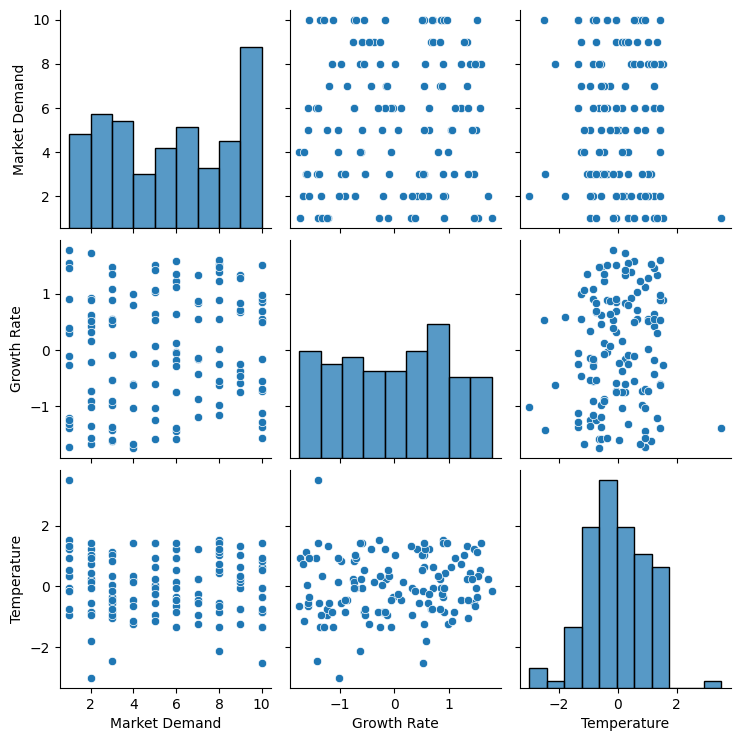

In [17]:
sns.pairplot(df_cleaned_scaled)

For descriptive statistics and visualization, The following variables are chosen:

1. Edibility: This categorical variable indicates whether a mushroom is edible or poisonous, which is central to understanding the dataset's context.
2. Habitat: Indicates the habitat of the mushroom, which could reveal patterns about where certain types of mushrooms are more likely to be found.
3. Cap Color: May show preferences or tendencies in mushroom colors related to edibility or habitat.
3. Temperature: The only numerical variable, which could provide insights into the environmental conditions mushrooms thrive in.

These variables are chosen because they can offer insights into mushroom characteristics, their edibility, and their environmental preferences, which are crucial for understanding mushroom distribution and safety.

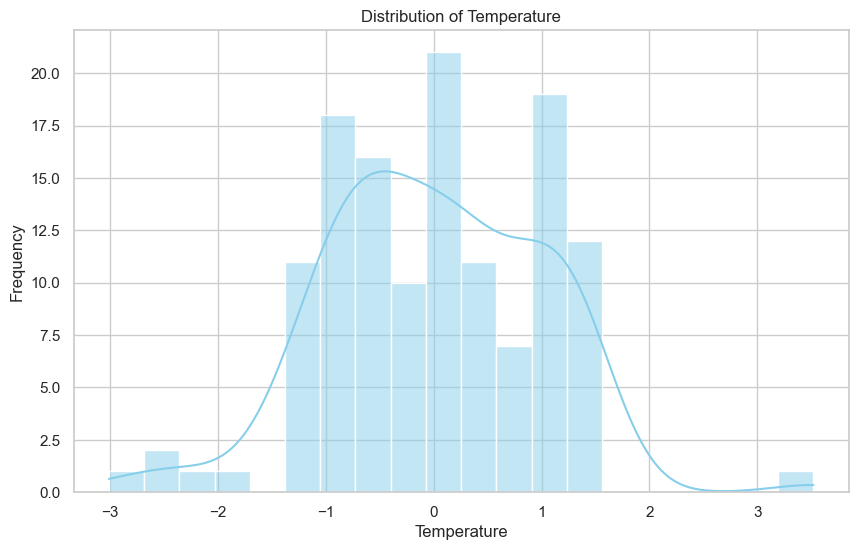

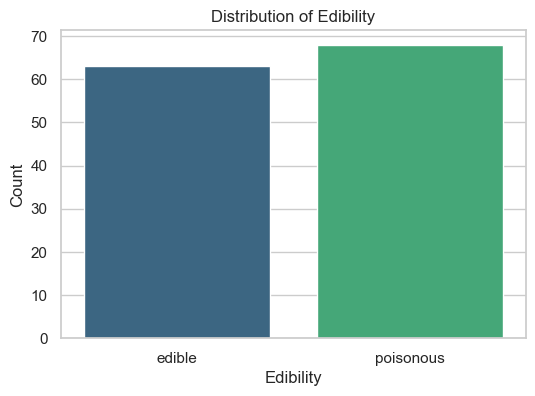

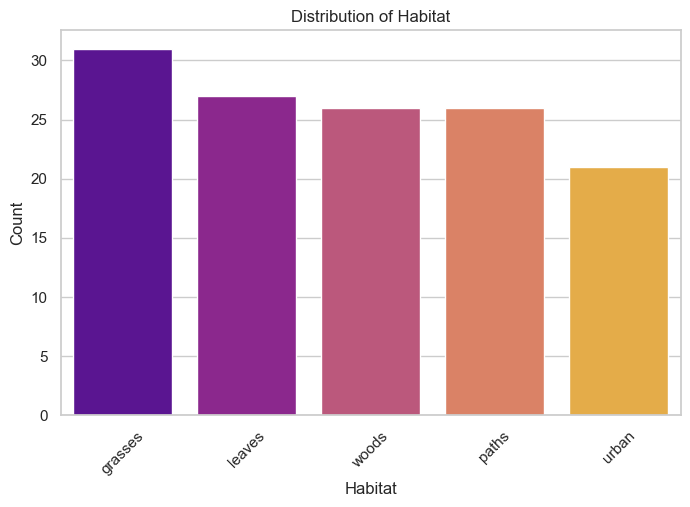

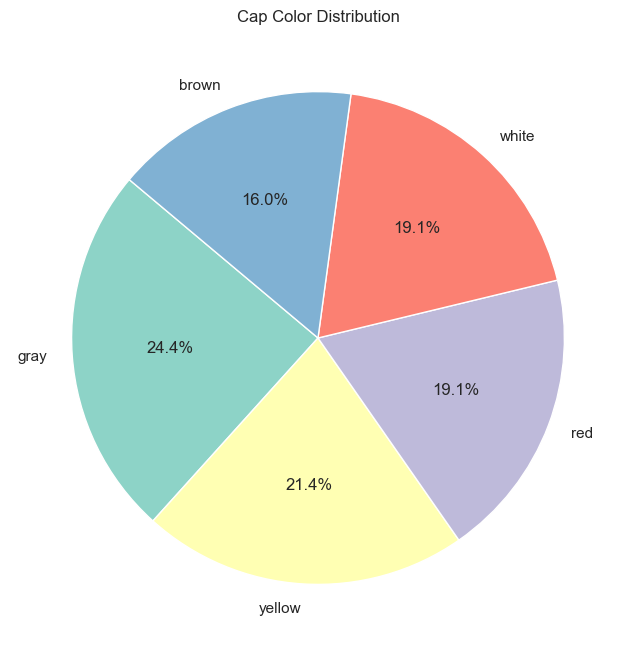

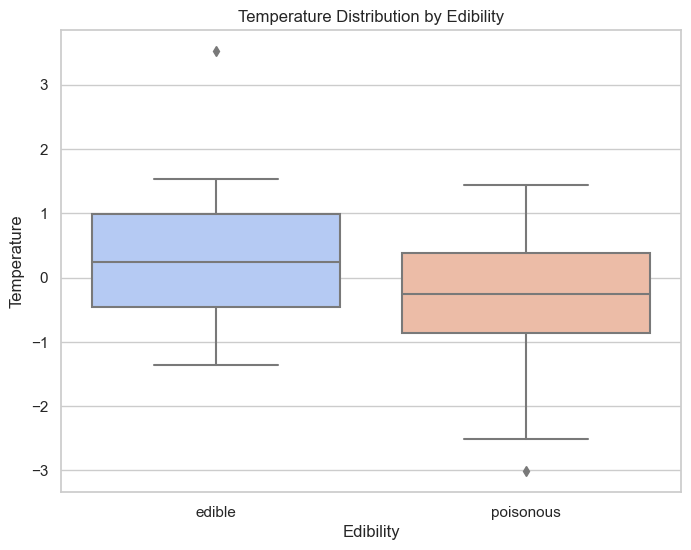

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histogram of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_scaled['Temperature'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Bar Chart for Edibility
plt.figure(figsize=(6, 4))
sns.countplot(x='Edibility', data=df_cleaned_scaled, palette='viridis')
plt.title('Distribution of Edibility')
plt.xlabel('Edibility')
plt.ylabel('Count')
plt.show()

# Bar Chart for Habitat
plt.figure(figsize=(8, 5))
sns.countplot(x='Habitat', data=df_cleaned_scaled, palette='plasma', order=df_cleaned_scaled['Habitat'].value_counts().index)
plt.title('Distribution of Habitat')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie Chart for Cap Color
cap_color_counts = df_cleaned_scaled['Cap Color'].value_counts()
plt.figure(figsize=(8, 8))
cap_color_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Cap Color Distribution')
plt.ylabel('') # Remove the y-label as it's unnecessary for a pie chart
plt.show()

# Box Plot of Temperature by Edibility
plt.figure(figsize=(8, 6))
sns.boxplot(x='Edibility', y='Temperature', data=df_cleaned_scaled, palette='coolwarm')
plt.title('Temperature Distribution by Edibility')
plt.xlabel('Edibility')
plt.ylabel('Temperature')
plt.show()


Visualizations and Insights

1. Histogram of Temperature: The temperature distribution shows a wide range, with a slight skew towards lower temperatures. Most mushrooms in this dataset prefer moderate climates, but there's a significant spread, indicating some species thrive in cooler or warmer conditions.

2. Bar Chart for Edibility: The distribution of edibility shows a nearly even split between edible and poisonous mushrooms, emphasizing the importance of identification for safety purposes.

3. Bar Chart for Habitat: Mushrooms are distributed across various habitats, with urban and grasses being slightly more common. This suggests a broad ecological adaptability, with significant numbers also found in woods, leaves, and paths. The presence of missing data indicates that habitat information is not always available, underscoring the challenge of comprehensive habitat documentation.

4. Pie Chart of Cap Color Distribution: The pie chart reveals a diverse range of cap colors, with gray, yellow, and white being slightly more prevalent. This diversity in colors might relate to different ecological strategies or evolutionary backgrounds.

5. Box Plot of Temperature by Edibility: The box plot indicates that both edible and poisonous mushrooms share similar temperature distributions, with a wide range of temperatures suitable for both types. There does not appear to be a distinct temperature preference that could be used to differentiate between edible and poisonous mushrooms based on temperature alone.

In [24]:
from sklearn.preprocessing import OrdinalEncoder
subset_df = df_cleaned[['Edibility', 'Habitat', 'Cap Color', 'Temperature']].copy()

# Encoding categorical variables
encoder = OrdinalEncoder()
subset_df_encoded = subset_df.copy()
subset_df_encoded[['Edibility', 'Habitat', 'Cap Color']] = encoder.fit_transform(subset_df[['Edibility', 'Habitat', 'Cap Color']])

knn_imputer = KNNImputer(n_neighbors=5)

# Applying KNNImputer on the correctly encoded dataset
subset_df_imputed = knn_imputer.fit_transform(subset_df_encoded)

# Converting imputed data back to a DataFrame
subset_df_imputed = pd.DataFrame(subset_df_imputed, columns=['Edibility', 'Habitat', 'Cap Color', 'Temperature'])

# Decoding the categorical variables back to their original values (including 'missing')
subset_df_imputed[['Edibility', 'Habitat', 'Cap Color']] = encoder.inverse_transform(subset_df_imputed[['Edibility', 'Habitat', 'Cap Color']].values)

# Displaying the first few rows of the imputed dataset to verify the imputation
subset_df_imputed.head()

,Edibility,Habitat,Cap Color,Temperature
0,edible,leaves,brown,49.0
1,edible,leaves,yellow,18.0
2,edible,urban,red,1.0
3,edible,woods,red,5.0
4,edible,urban,white,4.0


Relations Between Variables

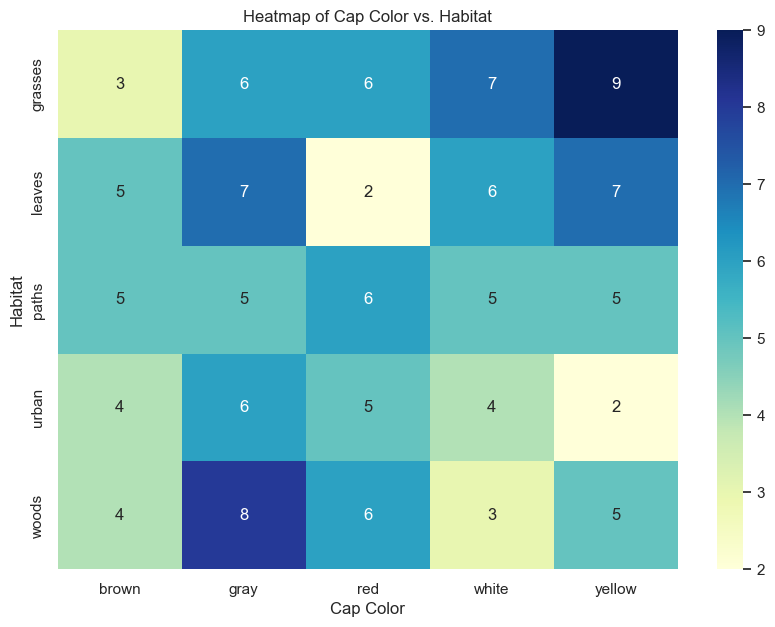

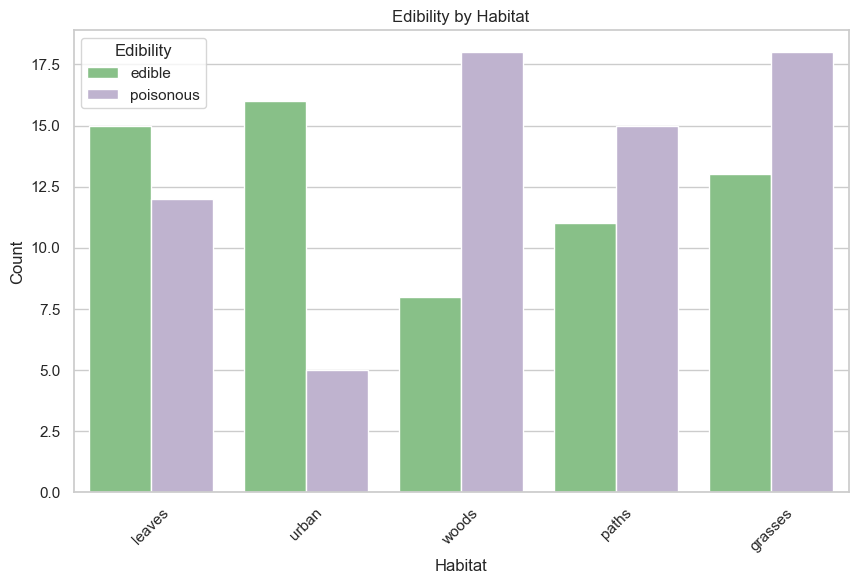

In [ ]:
# Heatmap of Cap Color vs. Habitat
plt.figure(figsize=(10, 7))
# Creating a cross-tabulation of Habitat vs. Cap Color
habitat_color_ct = pd.crosstab(df_cleaned_scaled['Habitat'], df_cleaned_scaled['Cap Color'])
sns.heatmap(habitat_color_ct, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Cap Color vs. Habitat')
plt.xlabel('Cap Color')
plt.ylabel('Habitat')
plt.show()

# Bar Plot of Edibility by Habitat
plt.figure(figsize=(10, 6))
sns.countplot(x='Habitat', hue='Edibility', data=df_cleaned_scaled, palette='Accent')
plt.title('Edibility by Habitat')
plt.xlabel('Habitat')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Edibility')
plt.show()


Visualizations and Observations:

1. Heatmap of Cap Color vs. Habitat: The heatmap reveals interesting patterns in the distribution of cap colors across different habitats. For instance, certain colors may be more prevalent in specific habitats, suggesting ecological adaptations or preferences. However, the presence of missing data in both dimensions indicates gaps in the dataset that could affect the interpretation of these patterns.

2. Bar Plot of Edibility by Habitat: This visualization shows how edibility distribution varies across different habitats. Some habitats might have a higher proportion of edible or poisonous mushrooms, which could inform foragers or researchers about potential risks or opportunities in specific environments. The presence of both edible and poisonous mushrooms across all habitats underscores the complexity of mushroom biodiversity and the importance of careful identification.